In [545]:
!pip install numpy
!pip install matplotlib
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [547]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [548]:
df_titanic.shape

(891, 12)

In [549]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [550]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [551]:
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

C:\Users\aarnoux\AppData\Local\Temp\ipykernel_18660\4080660716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)


In [552]:
df_titanic.dropna(subset=['Embarked'], inplace=True)

In [553]:
df_titanic.drop(columns=['Cabin'], inplace=True)

In [554]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [555]:
survived = df_titanic['Survived'].value_counts().explode().reset_index()
survived

,Survived,count
0,0,549
1,1,340


Text(0, 0.5, '')

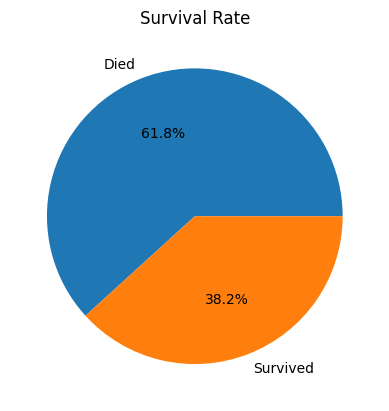

In [556]:
survived.plot(kind="pie", x="Survived", y="count", labels=["Died", "Survived"], autopct='%1.1f%%', legend=False, title="Survival Rate")
plt.ylabel('')

In [557]:
survived_x_class = df_titanic.groupby("Pclass")["Survived"].value_counts().unstack()
survived_x_class.columns = ["Died", "Survived"]
survived_x_class

,Died,Survived
Pclass,,
1,80,134
2,97,87
3,372,119


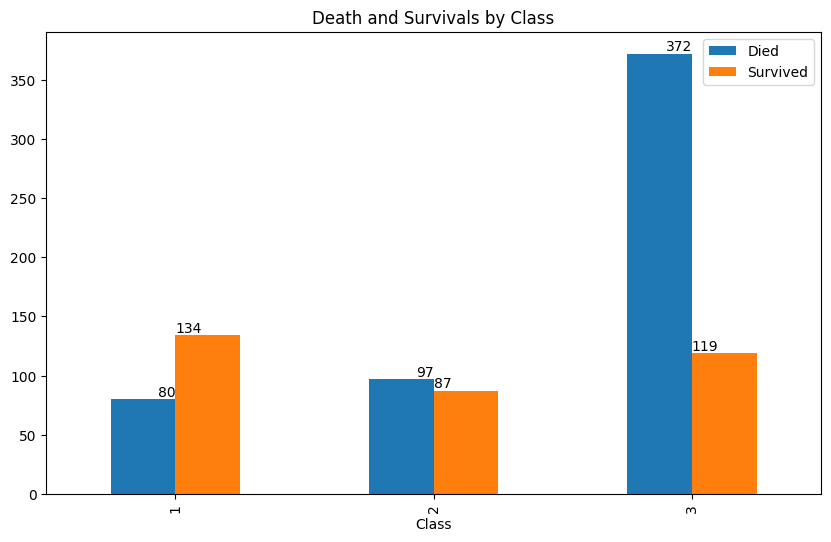

In [558]:
survived_x_class.plot(kind="bar", title="Death and Survivals by Class", figsize=(10, 6))
plt.xlabel('Class')

for i in range(len(survived_x_class)):
    plt.text(i, survived_x_class.iloc[i, 1], survived_x_class.iloc[i, 1], ha='left', va='bottom')
    plt.text(i, survived_x_class.iloc[i, 0], survived_x_class.iloc[i, 0], ha='right', va='bottom')

In [559]:
death_x_sex = df_titanic.groupby("Sex")["Survived"].value_counts().unstack()
death_x_sex.columns = ["Died", "Survived"]
death_x_sex

,Died,Survived
Sex,,
female,81,231
male,468,109


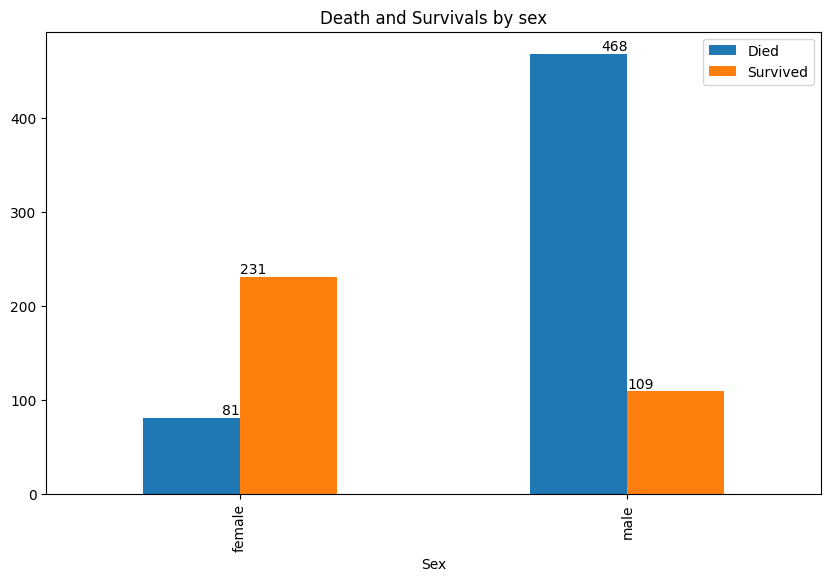

In [560]:
death_x_sex.plot(kind="bar", title="Death and Survivals by sex", figsize=(10, 6))

for i in range(len(death_x_sex)):
    plt.text(i, death_x_sex.iloc[i, 1], death_x_sex.iloc[i, 1], ha='left', va='bottom')
    plt.text(i, death_x_sex.iloc[i, 0], death_x_sex.iloc[i, 0], ha='right', va='bottom')

In [561]:
survival_rate_sex = df_titanic.groupby("Sex")["Survived"].value_counts(normalize=True).unstack()
survival_rate_sex.columns = ["Died", "Survived"]
survival_rate_sex

,Died,Survived
Sex,,
female,0.259615,0.740385
male,0.811092,0.188908


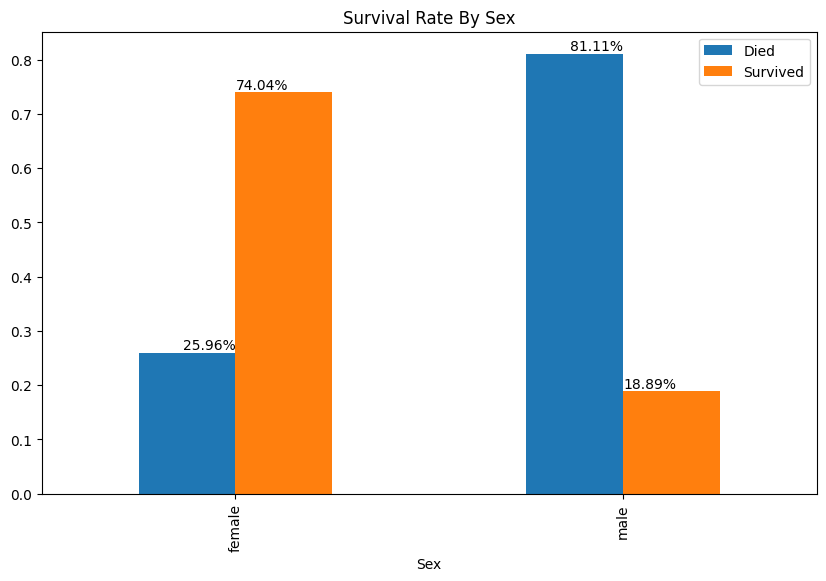

In [562]:
survival_rate_sex.plot(kind="bar", title="Survival Rate By Sex", figsize=(10, 6))

for i in range(len(survival_rate_sex)):
    plt.text(i, survival_rate_sex.iloc[i, 1], f"{survival_rate_sex.iloc[i, 1]*100:.2f}%", ha='left', va='bottom')
    plt.text(i, survival_rate_sex.iloc[i, 0], f"{survival_rate_sex.iloc[i, 0]*100:.2f}%", ha='right', va='bottom')

In [563]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [564]:
survival_by_fare = df_titanic.groupby("Fare")["Survived"].value_counts(normalize=True).unstack().sort_index(ascending=False)
survival_by_fare.columns = ["Died", "Survived"]
survival_by_fare.fillna(0, inplace=True)
survival_by_fare

,Died,Survived
Fare,,
512.3292,0.000000,1.000000
263.0000,0.500000,0.500000
262.3750,0.000000,1.000000
247.5208,0.500000,0.500000
227.5250,0.250000,0.750000
...,...,...
6.4375,1.000000,0.000000
6.2375,1.000000,0.000000
5.0000,1.000000,0.000000


In [565]:
survival_by_fare.drop(columns=["Died"], inplace=True)
survival_by_fare.shape

(247, 1)

In [566]:
survival_by_fare.reset_index(inplace=True)
survival_by_fare["rounded_fare"] = survival_by_fare["Fare"].apply(lambda x: round(x, -1)).reset_index(drop=True)
survival_by_fare.set_index("rounded_fare", inplace=True, drop=True)
survival_by_fare.drop(columns=["Fare"], inplace=True)

In [567]:
survival_by_fare

,Survived
rounded_fare,
510.0,1.000000
260.0,0.500000
260.0,1.000000
250.0,0.500000
230.0,0.750000
...,...
10.0,0.000000
10.0,0.000000
0.0,0.000000


In [568]:
survival_by_fare = survival_by_fare.groupby("rounded_fare")["Survived"].mean()
survival_by_fare

rounded_fare
0.0      0.022222
10.0     0.282115
20.0     0.481682
30.0     0.407087
40.0     0.388889
50.0     0.457143
60.0     0.708791
70.0     0.500000
80.0     0.743590
90.0     0.950000
110.0    0.604167
120.0    1.000000
130.0    1.000000
140.0    0.666667
150.0    0.722222
160.0    1.000000
210.0    0.500000
220.0    0.000000
230.0    0.750000
250.0    0.500000
260.0    0.750000
510.0    1.000000
Name: Survived, dtype: float64

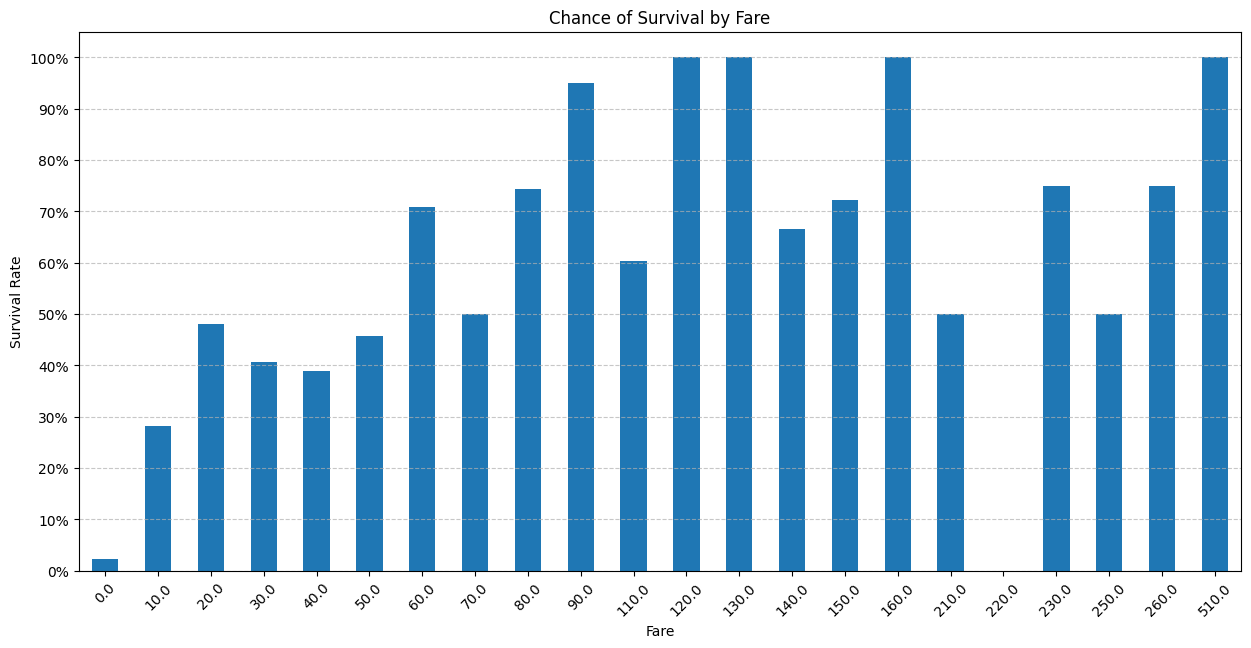

In [569]:
survival_by_fare.plot(kind="bar", title="Chance of Survival by Fare", figsize=(15, 7))
plt.ylabel("Survival Rate")
plt.xlabel("Fare")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1), labels=[f"{i:.0%}" for i in np.arange(0, 1.1, 0.1)])
plt.grid(linestyle='--', axis='y', alpha=0.7)

In [645]:
df_titanic["rounded_fare"] = df_titanic["Fare"].apply(lambda f: round(f, -1))
sex_age_fare = df_titanic.groupby(["Age", "rounded_fare", "Sex"])[["Sex", "Age", "rounded_fare", "Survived"]].value_counts(normalize=True).reset_index()

In [646]:
sex_age_fare = sex_age_fare[sex_age_fare["Survived"] == 1]

In [647]:
sex_age_fare.reset_index(inplace=True, drop=True)
sex_age_fare

,Age,rounded_fare,Sex,Survived,proportion
0,0.42,10.0,male,1,1.0
1,0.67,10.0,male,1,1.0
2,0.75,20.0,female,1,1.0
3,0.83,20.0,male,1,1.0
4,0.83,30.0,male,1,1.0
...,...,...,...,...,...
228,60.00,80.0,male,1,1.0
229,62.00,10.0,male,1,1.0
230,63.00,10.0,female,1,1.0
231,63.00,80.0,female,1,1.0


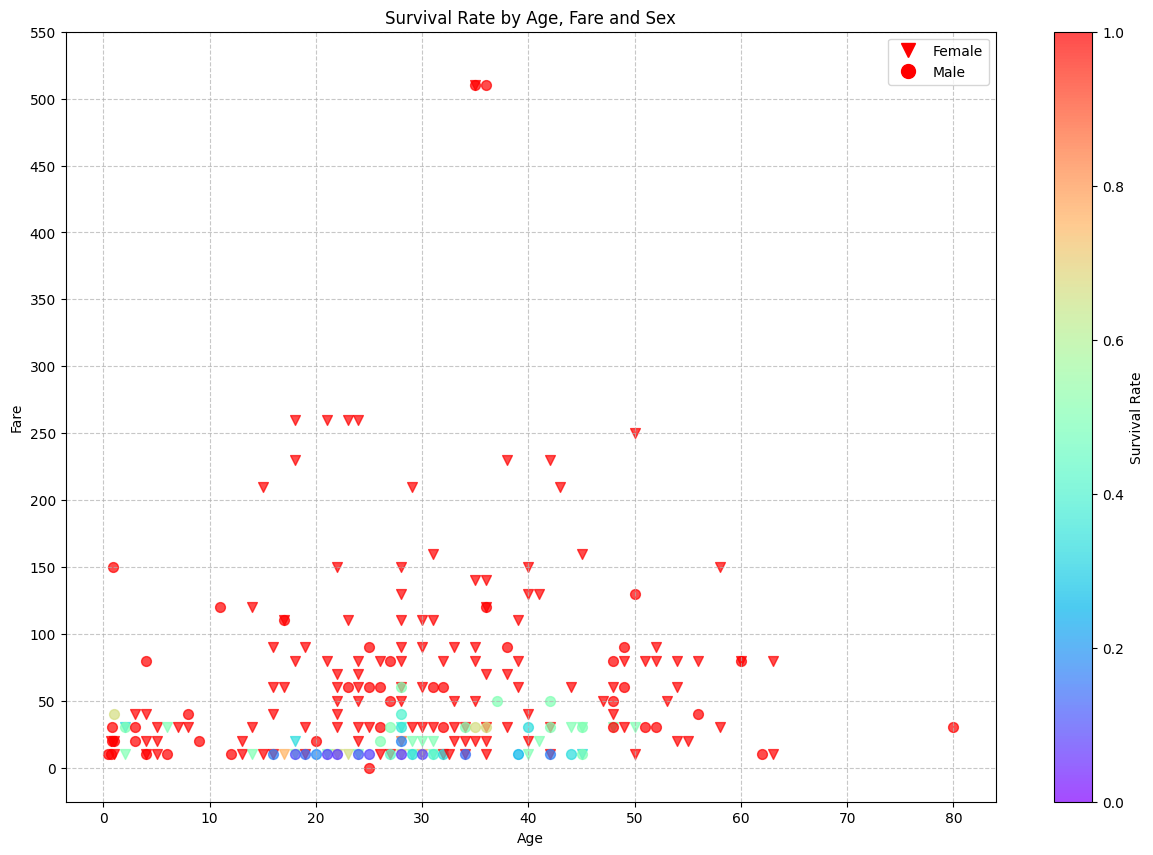

In [649]:
# sex_age_fare.plot(kind="scatter", x="Age", y="rounded_fare", c='proportion', cmap='rainbow', marker="x", s=15, vmin=0, vmax=1, figsize=(7, 5))
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Survival Rate by Age, Fare and Sex")
plt.rcParams["figure.figsize"] = (15, 10)

for i, row in sex_age_fare.iterrows():
    marker = 'v' if row['Sex'] == 'female' else 'o'
    plt.scatter(row['Age'], row['rounded_fare'], c=row['proportion'], cmap='rainbow', marker=marker, s=50, alpha=.7, vmin=0, vmax=1)

plt.colorbar(label="Survival Rate")

import matplotlib.lines as mlines

red_triangle = mlines.Line2D([], [], color='red', marker='v', linestyle='None',
                          markersize=10, label='Female')
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, label='Male')

plt.yticks(np.arange(0, 600, 50))

plt.legend(handles=[red_triangle, red_circle])
plt.grid(linestyle="--", alpha=0.7)